In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Activation
from tensorflow.keras.utils import to_categorical

In [2]:
import tensorflow.keras.backend as K

In [3]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import pickle
import random

In [4]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from datetime import datetime
from packaging import version

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
dirtrain='/content/drive/MyDrive/Grapes Leaf Dataset/train'



In [7]:
dirtest='/content/drive/MyDrive/Grapes Leaf Dataset/test'

In [8]:
categories=["Black_rot","Esca_(Black_Measles)","Healthy","Leaf_blight_(Isariopsis_Leaf_Spot)"]

(256, 256, 3)


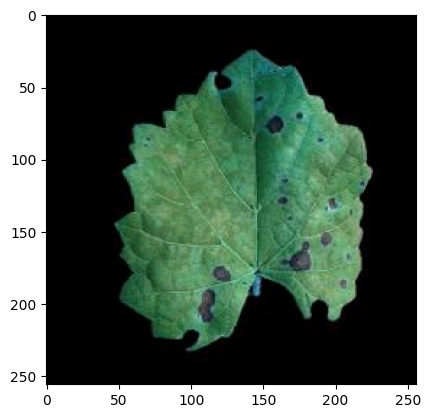

In [9]:
for c in categories:
    path=os.path.join(dirtrain,c)
    for i in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,i))
        print(img_array.shape)
        plt.imshow(img_array)
        plt.show()
        break
    break

In [10]:
training_data = []
def create_training_data():
    count=[]
    for c in categories:
        path=os.path.join(dirtrain,c)
        class_num=categories.index(c)
        c=0
        for i in os.listdir(path):
            c=c+1
            try:
                img_array=cv2.imread(os.path.join(path,i))
                #img_array=cv2.resize(img_array,(128,128))
                training_data.append([img_array,class_num])
            except Exception as e:
                pass
        count.append(c)
    return count
count_train=create_training_data()

In [11]:
testing_data = []
def create_testing_data():
    count=[]
    for c in categories:
        path=os.path.join(dirtest,c)
        class_num=categories.index(c)
        c=0
        for i in os.listdir(path):
            c=c+1
            try:
                img_array=cv2.imread(os.path.join(path,i))
                #img_array=cv2.resize(img_array,(128,128))
                testing_data.append([img_array,class_num])
            except Exception as e:
                pass
        count.append(c)
    return count
count_test=create_testing_data()

In [12]:
print(len(training_data))
print(count_train)
print(len(testing_data))
print(count_test)

3208
[965, 1155, 213, 875]
879
[210, 239, 220, 210]


In [13]:
random.shuffle(training_data)
random.shuffle(testing_data)


In [14]:
x_train = []
y_train = []
x_test = []
y_test = []


In [15]:
for features, label in training_data:
    x_train.append(features)
    y_train.append(label)
'''for features,label in testing_data:
    x_train.append(features)
    y_train.append(label)'''
x_train=np.array(x_train).reshape(-1,256,256,3)

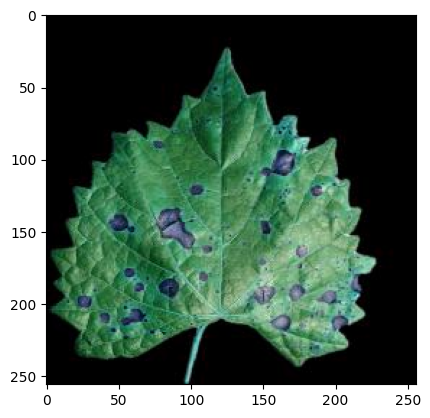

In [16]:
x=cv2.resize(training_data[0][0],(256,256))
plt.imshow(x,cmap='gray')

In [17]:
for features, label in testing_data:
    x_test.append(features)
    y_test.append(label)
x_test=np.array(x_test).reshape(-1,256,256,3)

In [18]:
def save_training_data(x_train,y_train):
    pickle_out=open("x_train_coloured.pickle","wb")
    pickle.dump(x_train,pickle_out)
    pickle_out.close()

    pickle_out=open("y_train_coloured.pickle","wb")
    pickle.dump(y_train,pickle_out)
    pickle_out.close
save_training_data(x_train,y_train)

In [19]:
def save_testing_data(x_test,y_test):
    pickle_out=open("x_test_coloured.pickle","wb")
    pickle.dump(x_test,pickle_out)
    pickle_out.close()

    pickle_out=open("y_test_coloured.pickle","wb")
    pickle.dump(y_test,pickle_out)
    pickle_out.close()
save_testing_data(x_test,y_test)

In [20]:
def load_data():
    pickle_in=open("x_train_coloured.pickle","rb")
    x_train=pickle.load(pickle_in)
    return x_train


In [21]:
x_train.shape

(3208, 256, 256, 3)

In [22]:
K.clear_session()
model=Sequential()
model.add(layers.Conv2D(32,(3,3),padding='same',input_shape=(256,256,3),activation='relu'))
model.add(layers.Conv2D(32,(3,3),activation='relu'))


model.add(layers.MaxPool2D(pool_size=(8,8)))

model.add(layers.Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(layers.Conv2D(32,(3,3),activation='relu'))

model.add(layers.MaxPool2D(pool_size=(8,8)))

model.add(Activation('relu'))

model.add(Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(4,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 254, 254, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 3, 32)          0         
 g2D)                                                   

In [24]:
y_train_cat=to_categorical(y_train,4)

In [25]:
y_test_cat=to_categorical(y_test,4)

In [41]:
model.fit(x_train,y_train_cat,batch_size=32,
          epochs=20,verbose=1,validation_split=0.15,shuffle=True)

Epoch 1/20
86/86 [==============================] - 6s 74ms/step - loss: 0.0764 - accuracy: 0.9835 - val_loss: 0.1221 - val_accuracy: 0.9772
Epoch 2/20
86/86 [==============================] - 6s 70ms/step - loss: 0.0706 - accuracy: 0.9853 - val_loss: 0.1643 - val_accuracy: 0.9627
Epoch 3/20
86/86 [==============================] - 6s 70ms/step - loss: 0.0694 - accuracy: 0.9857 - val_loss: 0.2263 - val_accuracy: 0.9627
Epoch 4/20
86/86 [==============================] - 6s 71ms/step - loss: 0.0297 - accuracy: 0.9960 - val_loss: 0.1412 - val_accuracy: 0.9772
Epoch 5/20
86/86 [==============================] - 6s 72ms/step - loss: 0.0597 - accuracy: 0.9901 - val_loss: 0.2180 - val_accuracy: 0.9668
Epoch 6/20
86/86 [==============================] - 6s 72ms/step - loss: 0.0380 - accuracy: 0.9905 - val_loss: 0.1078 - val_accuracy: 0.9772
Epoch 7/20
86/86 [==============================] - 6s 71ms/step - loss: 0.0404 - accuracy: 0.9927 - val_loss: 0.1102 - val_accuracy: 0.9834
Epoch 8/20
86

In [42]:
remedies = [
    "Apply fungicide X every two weeks.",
    "Prune infected branches and apply fungicide Y.",
    "Maintain regular care and monitor for any signs of disease.",
    "Use fungicide Z and ensure proper watering practices."
]


In [43]:
model.save("leaf_disease_coloured.h5")

In [44]:
new_model=tf.keras.models.load_model("leaf_disease_coloured.h5")

In [45]:
loss, acc = new_model.evaluate(x_test,y_test_cat, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))

28/28 - 1s - loss: 0.1189 - accuracy: 0.9852 - 685ms/epoch - 24ms/step
Restored model, accuracy: 98.52%


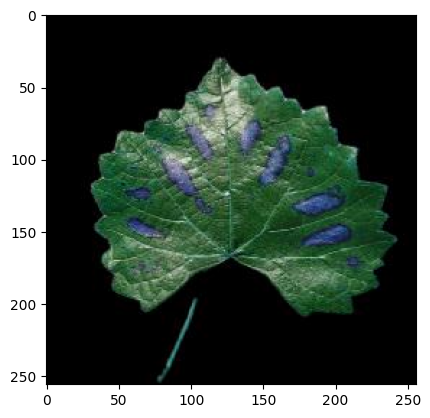

In [46]:
d='/content/drive/MyDrive/Grapes Leaf Dataset/0ad02171-f9d0-4d0f-bdbd-36ac7674fafc___FAM_B.Msls 4356_final_masked.jpg'
img=cv2.imread(d)
plt.imshow(img)

In [47]:
img=img.reshape(-1,256,256,3)

In [48]:
# Assuming new_model is your trained model
predictions = new_model.predict(img)
predicted_class = np.argmax(predictions)

print("Predicted Class:", predicted_class)


1/1 [==============================] - 0s 86ms/step
Predicted Class: 1


In [49]:
predicted_class

1

In [50]:
print(categories[predicted_class])
remedies[predicted_class]

Esca_(Black_Measles)


'Prune infected branches and apply fungicide Y.'

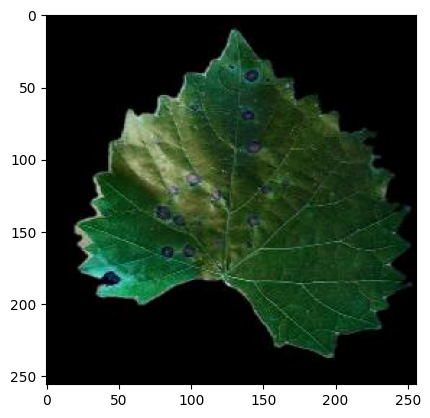

In [51]:
a='/content/drive/MyDrive/Grapes Leaf Dataset/0a06c482-c94a-44d8-a895-be6fe17b8c06___FAM_B.Rot 5019_final_masked.jpg'
img1=cv2.imread(a)
plt.imshow(img1)

In [52]:
img1=img1.reshape(-1,256,256,3)

In [53]:
prediction = new_model.predict(img1)
predicted_class = np.argmax(prediction)

print("Predicted Class:", predicted_class)
print(categories[predicted_class])
remedies[predicted_class]

1/1 [==============================] - 0s 18ms/step
Predicted Class: 0
Black_rot


'Apply fungicide X every two weeks.'

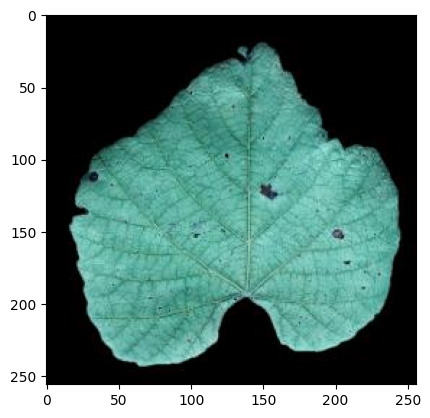

In [54]:
a='/content/drive/MyDrive/Grapes Leaf Dataset/00a962ad-573b-44b1-97ae-912a6bd6e0b0___FAM_L.Blight 1431_final_masked.jpg'
img1=cv2.imread(a)
plt.imshow(img1)


In [55]:
img1=img1.reshape(-1,256,256,3)
prediction = new_model.predict(img1)
predicted_class = np.argmax(prediction)

print("Predicted Class:", predicted_class)
print(categories[predicted_class])
remedies[predicted_class]

1/1 [==============================] - 0s 38ms/step
Predicted Class: 3
Leaf_blight_(Isariopsis_Leaf_Spot)


'Use fungicide Z and ensure proper watering practices.'